<a href="https://colab.research.google.com/github/Claudiars20/Twitter-NLP/blob/main/LDA_skLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerias:**
---

In [1]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import operator
from wordcloud import WordCloud
 

## **Tokens por trend:**
---

In [2]:
df = pd.read_csv("TRENDS-CSV.csv")
text_data = []
for i in range(df.shape[0]):
  a = df.iloc[i,2][2:-2]
  a = a.split("', '")
  cadena = ' '.join(a)
  text_data.append(cadena)



## **Bag of Words:**
---

In [3]:
# Creamos el BOW del corpus 
bow_corpus = CountVectorizer().fit(text_data)
count_tokens=bow_corpus.get_feature_names()
corpus_vect = bow_corpus.transform(text_data)
data_vectorized = bow_corpus.fit_transform(text_data)
df_count_vect=pd.DataFrame(data=corpus_vect.toarray(),columns=count_tokens)
display(df_count_vect) 

,00,000,00hrs,01,010821,02,0457,0458,0459,0460,0461,0463,05,06,07,08,10,100,11,12,120,13,130,135,14,149mil,15,1541m,1567m,15hrs,16,162km,17,18,1988,1995,1er,1ra,1ro,1ºministro,...,went,weverse,whatsapp,willax,world,would,wtf,xconstitucion,xddd,xuxa,yehude,yeonjun,yes,yolimar,york,you,yuli,yuliiii,yulimar,yulimarroja,zanja,zapatón,zona,zurda,zurdo,álbum,álvarez,árbitro,área,ármense,ávila,édgar,época,éxito,órden,último,únicamente,único,úsame,útil
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## **Nube de palabras:**
---

[('hacer', 32), ('ahora', 25), ('ser', 25), ('solo', 25), ('buen', 24), ('hoy', 24), ('poder', 24), ('ver', 24), ('pasar', 22), ('así', 21), ('dejar', 20), ('deber', 19), ('primero', 19), ('quedar', 19), ('querer', 19), ('castillo', 17), ('dar', 17), ('11', 16), ('decir', 16), ('ganar', 16), ('partido', 16), ('saber', 16), ('15', 15), ('día', 15), ('esperar', 15), ('gente', 15), ('liga1betssonxgolperu', 15), ('poner', 15), ('presidente', 15), ('seguir', 15)]


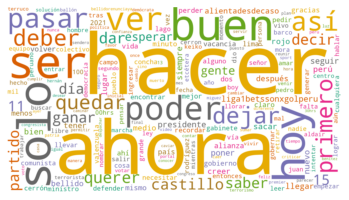

In [4]:
df_count_vect.to_csv('BOW.csv') # Guardamos el BOW en archivo csv
count_words = np.asarray(corpus_vect.sum(axis=0))[0]
diccionario = {count_tokens[n]: count_words[n] for n in range(len(count_tokens))}
# Se guarda el diccionario de las apariciones totales en el corpus
with open('AparicionesTotales.csv', 'w') as f:
    for key in diccionario.keys():
        f.write("%s,%s\n"%( key, diccionario[key]))

# Mostramos las 30 palabras que más se repiten 
sort = sorted(diccionario.items(),key=operator.itemgetter(1),reverse=True)
print(sort[0:30])

# Mostramos la nube de palabras
wordcloud = WordCloud(width=1800,height=1000,background_color='white',colormap='Dark2')#mask=peru_mask
wordcloud.generate_from_frequencies(frequencies=diccionario)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('WordCloud.png')
plt.show()

# **LDA (Latent Dirichlet Allocation)**
---

###***Porcentaje de celdas contienen valores distintos de cero***

In [5]:
data_dense = data_vectorized.todense()
print("Porcentaje de escasez: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Porcentaje de escasez:  4.560249206672683 %


###***Construcción LDA:***
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [6]:
lda_model = LatentDirichletAllocation(n_components=8,                  # Número de topicos
                                      max_iter=10,               # Número de interaciones max.
                                      learning_method='online',   
                                      random_state=100,          
                                      batch_size=128,            # Número de documentos por iteración
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Atributos del modelo

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=None,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


###***Parametros del modelo:***


In [7]:
pprint(lda_model.get_params())

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 8,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [8]:
# Nombres de Columnas
topicnames = ["Topic" + str(i) for i in range(8)]

# Dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=df['Name'])

# Topic dominante de cada documento
dom_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['Dominant_topic'] = dom_topic

# Estilo
def color(val):
    color = 'blue' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

df_document_topics = df_document_topic.head(39).style.applymap(color).applymap(bold)
display(df_document_topics)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Dominant_topic
Name,,,,,,,,,
#ASUMETUVOTOIDIOTA,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3
#FIGHT_OR_ESCAPE,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3
#LALIGATUITERA,0.000000,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000,3
#ONYOUR23RDMARK,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,0.000000,0.000000,5
#VACANCIAPEDROCASTILLO,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3
ADRIANA TUDELA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,7
ALARCÓN,0.000000,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000,3
ALDAIR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970000,0.000000,6
ALIANZA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6


## ***Distribución de tópicos:***

In [11]:
df_topic_distribution = df_document_topic['Dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Num. Topic', 'Num. Documents']
df_topic_distribution


,Num. Topic,Num. Documents
0,3,16
1,6,12
2,2,7
3,5,5
4,0,4
5,7,3
6,4,1
7,1,1


## ***pyLDAvis*** 

In [12]:
!pip install pyLDAvis==2.1.2


     |████████████████████████████████| 1.6 MB 8.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=cc11b50642ceac9f00bed72243afdcb952a55b565fc1b019588b1a665882eac0
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [13]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, bow_corpus, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3     -108.958252 -208.941483       1        1  41.317104
2      186.487061  -98.103249       2        1  18.394672
6       19.245832  160.858780       3        1  14.894336
7      170.658829   75.445076       4        1   9.138216
0       -1.386411  -35.043739       5        1   5.073841
5     -145.800095  106.944611       6        1   4.763919
1       64.834541 -221.825272       7        1   4.453783
4     -196.906036  -58.990913       8        1   1.964129, topic_info=           Term      Freq     Total Category  logprob  loglift
42         2021  5.000000  5.000000  Default  30.0000  30.0000
26           15  8.000000  8.000000  Default  29.0000  29.0000
795      concha  5.000000  5.000000  Default  28.0000  28.0000
2912  rodríguez  5.000000  5.000000  Default  27.0000  27.0000
18           11  8.000000  8.000000  Default  26.0000  26.0000
...         ...       ...       ...      ...      ...      ...
615        casi  0.147969  2.088126   Topic8  -6.9540   1.2831
2326      nuevo  0.149537  8.122367   Topic8  -6.9434  -0.0647
993    defender  0.149362  6.174105   Topic8  -6.9446   0.2084
3405        vez  0.149360  6.660128   Topic8  -6.9446   0.1326
417         año  0.149246  5.122154   Topic8  -6.9454   0.3944

[556 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2         1  0.314479  00hrs
2         2  0.314479  00hrs
2         3  0.157240  00hrs
3         1  0.431017     01
3         7  0.431017     01
...     ...       ...    ...
3458      3  0.505053    vía
3462      1  0.784771    was
3480      1  0.615938    you
3502      2  0.550280  único
3502      3  0.275140  único

[605 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 7, 8, 1, 6, 2, 5])

## ***Palabras clave x Tema:***

In [14]:
# Matriz de Keywords
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Asignar valores columnas
df_topic_keywords.columns = bow_corpus.get_feature_names()
df_topic_keywords.index = topicnames

# Mostrar
df_topic_keywords.head()

,00,000,00hrs,01,010821,02,0457,0458,0459,0460,0461,0463,05,06,07,08,10,100,11,12,120,13,130,135,14,149mil,15,1541m,1567m,15hrs,16,162km,17,18,1988,1995,1er,1ra,1ro,1ºministro,...,went,weverse,whatsapp,willax,world,would,wtf,xconstitucion,xddd,xuxa,yehude,yeonjun,yes,yolimar,york,you,yuli,yuliiii,yulimar,yulimarroja,zanja,zapatón,zona,zurda,zurdo,álbum,álvarez,árbitro,área,ármense,ávila,édgar,época,éxito,órden,último,únicamente,único,úsame,útil
Topic0,0.271993,0.308473,0.317780,0.341211,0.294995,0.311093,0.297099,0.315766,0.321094,0.305151,0.298116,0.275055,0.344741,0.340352,0.310215,0.327369,0.299996,0.334466,0.320981,0.324696,0.323397,0.265921,0.286296,0.292305,0.322772,0.272105,4.976904,1.105958,1.052504,0.281012,0.298312,0.306296,0.294614,0.279241,0.300870,1.081451,0.310947,0.314276,0.262248,0.316310,...,0.318169,0.335171,0.304163,1.112099,1.108181,0.291606,0.326035,0.319134,0.265748,0.285312,0.297123,0.280604,0.283705,0.327602,0.290671,0.328539,1.060779,1.075289,1.048079,1.088073,0.318018,0.317389,0.344989,0.294752,0.325744,0.284289,0.314409,0.301839,0.300791,0.290895,0.280905,0.355649,1.086622,0.295602,0.280345,1.086318,0.340033,0.322493,0.267450,0.305547
Topic1,1.081735,0.321295,0.349285,2.785206,0.295301,1.106136,1.072926,1.079190,1.069054,1.051785,1.075499,0.318439,1.057406,1.087928,1.186777,1.152294,1.095672,0.289408,1.881122,1.084798,0.279253,0.315469,0.344283,1.099192,0.282656,1.094044,0.332478,0.266754,0.248528,0.355513,0.287580,0.296233,0.326628,0.361180,0.272214,0.333627,0.302768,0.313115,0.309948,0.275455,...,0.295142,0.304448,0.301456,0.319329,0.281553,0.302504,0.275785,0.341309,0.301958,0.349693,0.276911,0.313095,0.251334,0.284005,1.128922,0.290079,0.282365,0.297941,0.289213,0.316661,0.278161,0.302643,1.063892,0.290607,0.324390,0.286981,0.276387,0.287342,0.321145,0.305811,0.266490,0.284334,0.261972,0.308870,0.309621,0.380763,0.308866,0.339477,0.320783,0.303231
Topic2,0.296315,1.067611,3.492605,0.291370,0.323439,0.321103,0.327169,0.295498,0.288610,0.305892,0.308124,0.298452,0.303695,0.317410,0.270449,0.292883,1.896014,2.636888,8.740505,0.280832,1.032418,3.486854,1.070011,0.291365,0.323358,0.291073,1.915746,0.314804,0.318798,1.869306,0.288790,0.315861,0.299612,0.311812,0.308687,0.354851,1.086554,0.312615,0.285745,0.297813,...,0.308483,0.281058,0.297086,1.004683,0.311156,0.292313,0.299354,0.315407,1.030195,0.311462,0.300526,0.292708,0.279355,0.264324,0.282229,0.312046,0.287082,0.277435,0.315810,0.316649,0.301604,1.061614,0.315307,1.024132,1.097660,0.355380,0.261751,0.288165,1.793306,0.331621,0.300107,0.322952,0.285984,0.326047,1.068748,1.842502,0.293990,3.379937,0.303515,0.301232
Topic3,0.290098,0.272691,2.705993,0.937524,1.823962,0.308502,0.271863,0.264383,0.292903,0.327679,0.258550,1.068272,0.293980,0.290511,1.015039,1.060484,0.295982,3.330719,1.138589,0.246158,0.292375,1.119830,0.309503,0.298883,1.112524,0.341460,4.521411,0.288530,0.304830,0.309765,1.087399,1.138994,1.070147,2.681873,1.132260,1.030087,0.309864,0.304882,1.108010,1.059474,...,1.823780,1.829870,1.075459,0.363255,1.000499,0.287584,1.020513,1.711994,1.067325,0.284859,0.290772,1.089514,0.291069,1.072340,0.272452,2.604586,0.275156,0.319585,1.036185,0.308665,1.024295,0.257727,1.026341,0.298991,1.022672,1.052793,0.454667,1.060555,0.319683,1.831619,0.319640,0.305866,0.301845,1.093955,1.012616,1.076265,1.821548,0.315772,0.304640,1.035890
Topic4,0.321109,0.298224,0.282162,0.303164,0.380799,0.311348,0.272076,0.286056,0.272546,0.283682,0.276180,0.315403,0.304814,0.301076,0.336754,0.267566,0.294598,1.127080,0.302437,0.341725,0.301647,0.286485,0.316990,0.277542,0.331662,0.281911,0.373379,0.337192,0.307994,0.277362,0.327435,0.270275,0.277480,0.294157,0.305457,0.278544,0.296684,0.284103,0.307933,0.265229,...,0.383351,0.368479,0.270857,0.318787,0.342357,1.098865,0.278244,0.303581,0.305524,0.332197,0.299872,0.312969,1.081301,0.276778,0.273836,0.385526,0.304616,0.290774,0.344419,0.312238,0.309960,0.348029,0.294867,0.296432,0.305033,0.321354,0.340577,0.319572,0.33

In [18]:
# Show top n keywords for each topic
def show_topics(bow_corpus, lda_model=lda_model, n_words=20):
    keywords = np.array(bow_corpus.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(bow_corpus, lda_model=lda_model, n_words=35)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20,Word 21,Word 22,Word 23,Word 24,Word 25,Word 26,Word 27,Word 28,Word 29,Word 30,Word 31,Word 32,Word 33,Word 34
Topic 0,15,hacer,solo,día,grande,ver,vida,comunista,alguno,gracias,querer,país,tokyo2020,familia,muerto,libre,presidente,vender,67,venezuela,talento,chicle,sucio,volver,dio,patria,valer,atleta,dasaparecerlo,perteneciente,ganar,lejano,intentar,tierra,nombrar
Topic 1,2021,80,01,11,42,fuerte,pasar,hoy,loúltir,bellido,latitud,poder,hacer,magnitud,igp,solo,07,profundidad,ahora,dejar,querer,decir,así,sentir,hora,47,lugar,referencia,censis,nuevo,gente,iii,buen,intensidad,castillo
Topic 2,11,ser,hacer,ahora,00hrs,30hrs,13,dos,pasar,poner,partido,dejar,único,encontrar,bien,solo,inteligente,buen,bajar,historia,nuevo,presidente,discurso,perú,balón,90,rojinegro,equipo,ppc,ganado,generar,bordacahar,trick,regate,pereyra
Topic 3,ver,hacer,buen,esperar,dar,solo,poder,seguir,hoy,primero,dejar,deber,pasar,siempre,así,democracia,ahora,gobierno,saber,ser,país,llevar,perú,castillo,decir,después,gente,ahí,sacar,venir,hablar,leer,entonces,pedir,vivo
Topic 4,primero,hacer,dejar,ver,pasar,from,dio,después,poner,esperar,dar,ser,the,quedar,was,medio,limpio,ocon,vettel,nuevo,run,factual,defender,vez,año,segundo,sure,hungaroring,carro,love,than,regalar,casi,fácil,how
Topic 5,querer,buen,ser,hacer,llegar,quedar,así,amar,hoy,luz,pasar,feliz,tener,decir,poder,hombre,rápido,gracias,sentir,mil,dia,acabar,siempre,castillo,salud,leer,dar,ganar,cumpleaños,solo,mark,onyour23rdmark,lograr,happymarkday,farito
Topic 6,ahora,concha,rodríguez,liga1betssonxgolperu,mora,alianza,valenzuela,alientadesdecaso,barco,lago,aldair,hacer,poder,partido,rojo,portal,lima,sport,hernán,inicial,vía,boy,once,campo,deber,miguez,lugar,ballón,solo,así,ingresar,hoy,medio,retirar,necesitar
Topic 7,castillo,cerrón,bellido,poder,ver,perú,gabinete,hoy,día,alberto,fujimori,cambiar,llegar,buen,momento,esperar,presidente,vacancia,entrar,confirmar,política,cualquiera,siempre,tomar,claro,izquierda,vacar,tío,moral,colectivo,mirar,idea,pensar,representar,fácil


## ***Referencias:***
*   https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/?__cf_chl_managed_tk__=pmd_a88dfbc5f297286cf47fca48ca08f11e5a71321e-1627875857-0-gqNtZGzNA3ijcnBszQ-i
* http://brandonrose.org/clustering_mobile
* https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24